# **Problem Statement**

## **Business Context**

Workplace safety in hazardous environments like construction sites and industrial plants is crucial to prevent accidents and injuries. One of the most important safety measures is ensuring workers wear safety helmets, which protect against head injuries from falling objects and machinery. Non-compliance with helmet regulations increases the risk of serious injuries or fatalities, making effective monitoring essential, especially in large-scale operations where manual oversight is prone to errors and inefficiency.

To overcome these challenges, SafeGuard Corp plans to develop an automated image analysis system capable of detecting whether workers are wearing safety helmets. This system will improve safety enforcement, ensuring compliance and reducing the risk of head injuries. By automating helmet monitoring, SafeGuard aims to enhance efficiency, scalability, and accuracy, ultimately fostering a safer work environment while minimizing human error in safety oversight.

## **Objective**

As a data scientist at SafeGuard Corp, you are tasked with developing an image classification model that classifies images into one of two categories:
- **With Helmet:** Workers wearing safety helmets.
- **Without Helmet:** Workers not wearing safety helmets.

## **Data Description**

The dataset consists of **631 images**, equally divided into two categories:

- **With Helmet:** 311 images showing workers wearing helmets.
- **Without Helmet:** 320 images showing workers not wearing helmets.

**Dataset Characteristics:**
- **Variations in Conditions:** Images include diverse environments such as construction sites, factories, and industrial settings, with variations in lighting, angles, and worker postures to simulate real-world conditions.
- **Worker Activities:** Workers are depicted in different actions such as standing, using tools, or moving, ensuring robust model learning for various scenarios.

# **Installing and Importing the Necessary Libraries**

In [1]:
#%pip install tensorflow[and-cuda] numpy==1.25.2 -q

In [2]:

import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available: 1


In [3]:
with tf.device('/GPU:0'):
         a = tf.constant([1.0, 2.0, 3.0])
         b = tf.constant([4.0, 5.0, 6.0])
         c = a + b
         print(c)



tf.Tensor([5. 7. 9.], shape=(3,), dtype=float32)


2025-07-27 21:59:51.022747: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Pro
2025-07-27 21:59:51.022766: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2025-07-27 21:59:51.022769: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.00 GB
2025-07-27 21:59:51.022786: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-07-27 21:59:51.022796: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


**Note:**

- After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.

- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [4]:
import os
import random
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2


# Tensorflow modules
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16                                               # Importing confusion_matrix to plot the confusion matrix

# Display images using matplotlib (alternative to cv2_imshow for Jupyter Notebooks)
def cv2_imshow(image):
	"""Display an image using matplotlib."""
	plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
	plt.axis('off')
	plt.show()

#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report
from sklearn.metrics import mean_squared_error as mse                                                 # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

# **Data Overview**


## Loading the data

In [6]:
images = np.load('images_proj.npy') 

labels = pd.read_csv('Labels_proj.csv')
# Verify the shape of the images and labels
print("Shape of images:", images.shape)
print("Shape of labels:", labels.shape)

# Check the first few entries of labels to ensure they are loaded correctly
print("First few labels:")
print(labels.head())

Shape of images: (631, 200, 200, 3)
Shape of labels: (631, 1)
First few labels:
   Label
0      1
1      1
2      1
3      1
4      1


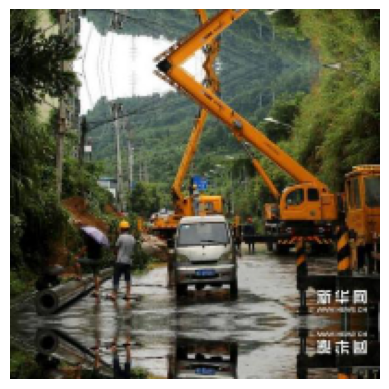

In [7]:
# Display the first image in the dataset
cv2_imshow(images[0])

# **Exploratory Data Analysis**

### Plot random images from each of the classes and print their corresponding labels.

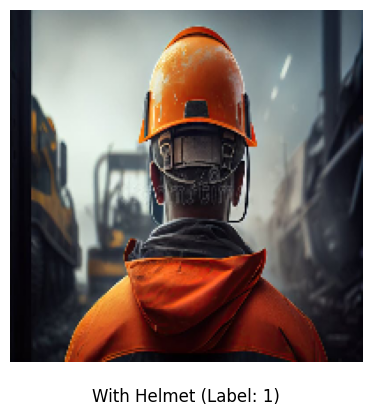

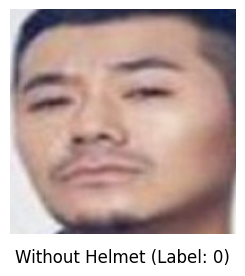

Label for image with helmet: 1
Label for image without helmet: 0


In [8]:
# Get indices for each class
with_helmet_indices = labels[labels['Label'] == 1].index
without_helmet_indices = labels[labels['Label'] == 0].index

# Randomly select one image from each class
random_with_helmet = random.choice(with_helmet_indices)
random_without_helmet = random.choice(without_helmet_indices)
# Swap the indices if needed to ensure correct alignment
if labels.iloc[random_with_helmet]['Label'] != 1:
    random_with_helmet, random_without_helmet = random_without_helmet, random_with_helmet
# Plot the images
plt.figure(figsize=(10, 5))

# Image with helmet
plt.subplot(1, 2, 1)
plt.text(0.5, -0.1, f"With Helmet (Label: {labels.iloc[random_with_helmet]['Label']})", 
         ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)
#plt.text(0.5, -0.1, "With Helmet", ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)
cv2_imshow(images[random_with_helmet])
#plt.axis('off')

plt.subplot(1, 2, 1)
plt.text(0.5, -0.1, f"Without Helmet (Label: {labels.iloc[random_without_helmet]['Label']})", 
         ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)
#plt.text(0.5, -0.1, "With Helmet", ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)
cv2_imshow(images[random_without_helmet])

# Print corresponding labels
print(f"Label for image with helmet: {labels.iloc[random_with_helmet]['Label']}")
print(f"Label for image without helmet: {labels.iloc[random_without_helmet]['Label']}")

## Checking for class imbalance


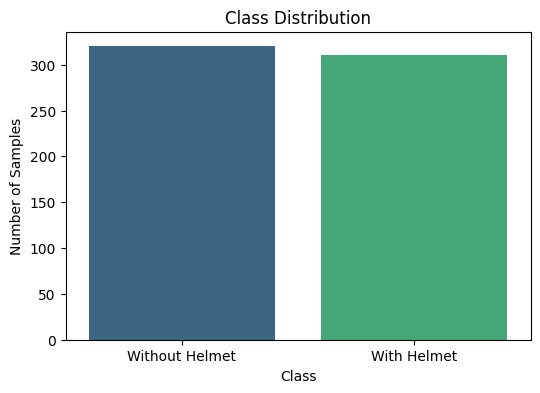

Class Distribution:
0    320
1    311
Name: Label, dtype: int64


In [9]:
# Count the number of samples in each class
class_distribution = labels['Label'].value_counts()

# Plot the class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.xticks(ticks=[0, 1], labels=["Without Helmet", "With Helmet"])
plt.show()

# Print the class distribution
print("Class Distribution:")
print(class_distribution)


### Class Imbalance Summary

The dataset contains **631 images** divided into two classes:

- **With Helmet:** 311 images (49.3%)
- **Without Helmet:** 320 images (50.7%)

The class distribution is relatively balanced, with a slight majority of images in the "Without Helmet" category.


# **Data Preprocessing**

### Splitting the dataset



# **Model Building**

### Model Evaluation Criteria

When all models achieve perfect accuracy (1.0), additional evaluation criteria become essential to differentiate their performance and suitability for deployment. These criteria include:

1. **Complexity**: Simpler models (e.g., CNN) are easier to train, deploy, and maintain, requiring fewer computational resources compared to complex models like VGG-16 with FFNN and data augmentation.

2. **Training Time**: Models with fewer layers or parameters typically train faster, which can be advantageous in scenarios with limited computational resources or time constraints.

3. **Generalization**: Models trained with data augmentation (e.g., VGG-16 Augmented FFNN) are likely to generalize better to unseen data, making them more robust for real-world applications.

4. **Scalability**: Pre-trained models like VGG-16 are better suited for transfer learning and can be adapted to similar tasks with minimal effort, making them ideal for scaling to other safety-related applications.

5. **Interpretability**: Simpler models are often easier to interpret and debug, which can be beneficial for understanding model behavior and ensuring compliance with safety standards.

While accuracy is perfect across all models, the choice of the best model depends on the specific requirements of the application, such as computational constraints, deployment environment, and the need for scalability or robustness.

## Utility Functions


### Utility Functions

#### 1. `model_performance_classification(model, predictors, target)`
Computes various metrics to evaluate the performance of a classification model:
- **Accuracy**
- **Recall**
- **Precision**
- **F1 Score**

Returns a DataFrame summarizing the metrics.

#### 2. `plot_confusion_matrix(model, predictors, target, ml=False)`
Plots the confusion matrix for a given model and dataset. Supports both machine learning models and non-ML models.

#### 3. `prepare_data_for_model(images, labels, model_type='grayscale', test_size=0.2, val_size=0.5, random_state=42)`
Prepares data for different model types (grayscale for CNN, color for VGG-16) with proper preprocessing:
- Splits data into training, validation, and test sets.
- Normalizes image pixel values to [0, 1].
- Displays a summary of the prepared data.

#### 4. `evaluate_model_comprehensive(model, X_train, y_train, X_val, y_val, X_test, y_test, model_name="Model")`
Performs a comprehensive evaluation of a model:
- Computes performance metrics for training, validation, and test datasets.
- Plots the confusion matrix for the test set.

#### 5. `train_and_plot_history(model, X_train, y_train, X_val, y_val, epochs=10, batch_size=32, model_name="Model")`
Trains a model and visualizes the training history:
- Plots training and validation accuracy.
- Plots training and validation loss.

#### 6. `visualize_predictions(model, X_test, y_test, num_samples=5, model_name="Model")`
Visualizes predictions made by the model on random test samples:
- Displays the test images along with predicted and true labels.


In [10]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors).reshape(-1)>0.5

    target = target.to_numpy().reshape(-1)


    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},index=[0],)

    return df_perf

In [11]:
def plot_confusion_matrix(model, predictors, target, ml=False):
    """
    Function to plot the confusion matrix

    model: classifier
    predictors: independent variables
    target: dependent variable
    ml: To specify if the model used is an sklearn ML model or not (True means ML model)
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors).reshape(-1) > 0.5

    target = target.to_numpy().reshape(-1)

    # Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
    confusion_matrix = tf.math.confusion_matrix(target, pred)
    f, ax = plt.subplots(figsize=(6, 4))  # Adjusted figsize to make the plot smaller
    sns.heatmap(
        confusion_matrix,
        annot=True,
        linewidths=.4,
        fmt="d",
        square=True,
        ax=ax
    )
    plt.show()

In [12]:

def prepare_data_for_model(images, labels, model_type='grayscale', test_size=0.2, val_size=0.5, random_state=42):
    """
    Prepare data for different model types with proper preprocessing
    
    Args:
        images: Raw image data
        labels: Labels dataframe
        model_type: 'grayscale' for CNN, 'color' for VGG16
        test_size: Proportion for test split
        val_size: Proportion for validation split from remaining data
        random_state: Random seed
    
    Returns:
        Tuple of (X_train, X_val, X_test, y_train, y_val, y_test)
    """
    # Choose image type
    if model_type == 'grayscale':
        processed_images = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in images])
        # Add channel dimension for CNN
        processed_images = np.expand_dims(processed_images, axis=-1)
    else:  # color for VGG16
        processed_images = images
    
    # Split the data
    X_train, X_temp, y_train, y_temp = train_test_split(
        processed_images, labels['Label'], 
        test_size=test_size, random_state=random_state, stratify=labels['Label']
    )
    
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, 
        test_size=val_size, random_state=random_state, stratify=y_temp
    )
    
    # Normalize to [0,1]
    X_train = X_train.astype('float32') / 255.0
    X_val = X_val.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0
    
    # Convert the prepared data into a DataFrame for display
    data_summary = pd.DataFrame({
        "Dataset": ["Training", "Validation", "Test"],
        "Shape": [str(X_train.shape), str(X_val.shape), str(X_test.shape)],
        "Min Value": [X_train.min(), X_val.min(), X_test.min()],
        "Max Value": [X_train.max(), X_val.max(), X_test.max()]
    })
    
    print(f"Data prepared for {model_type} model:")
    display(data_summary)
    
    return X_train, X_val, X_test, y_train, y_val, y_test


def evaluate_model_comprehensive(model, X_train, y_train, X_val, y_val, X_test, y_test, model_name="Model"):
    """
    Comprehensive model evaluation with all metrics and visualizations
    """
    print(f"\n{'='*50}")
    print(f"COMPREHENSIVE EVALUATION: {model_name}")
    print(f"{'='*50}")
    
    # Performance metrics for all datasets
    datasets = [
        (X_train, y_train, "Training"),
        (X_val, y_val, "Validation"), 
        (X_test, y_test, "Test")
    ]
    performance_data = []
    for X_data, y_data, dataset_name in datasets:
        performance_df = model_performance_classification(model, X_data, y_data)
        #performance_df = pd.DataFrame(performance_data)
        print(f"\nModel Performance Summary:{dataset_name}")
        display(performance_df)
    
    # Confusion matrix for test set
    print(f"\n{model_name} - Test Set Confusion Matrix:")
    plot_confusion_matrix(model, X_test, y_test, ml=True)
    
    return model


def train_and_plot_history(model, X_train, y_train, X_val, y_val, epochs=10, batch_size=32, model_name="Model"):
    """Train model and plot training history"""
    print(f"\nTraining {model_name}...")
    
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        verbose=1
    )
    
    # Plot training history
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    print(f"{model_name} training completed!")
    return history

def visualize_predictions(model, X_test, y_test, num_samples=5, model_name="Model"):
    """Visualize model predictions on test samples"""
    # Get predictions
    predictions = (model.predict(X_test) > 0.5).astype(int)
    
    # Select random samples
    random_indices = random.sample(range(len(X_test)), num_samples)
    
    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(random_indices):
        plt.subplot(1, num_samples, i + 1)
        
        # Handle different image shapes (grayscale vs color)
        if X_test[idx].shape[-1] == 1:
            plt.imshow(X_test[idx].squeeze(), cmap='gray')
        else:
            plt.imshow(X_test[idx])
            
        predicted_label = predictions[idx][0]
        actual_label = y_test.iloc[idx]
        
        plt.title(f"Pred: {'Helmet' if predicted_label == 1 else 'No Helmet'}\n"
                 f"True: {'Helmet' if actual_label == 1 else 'No Helmet'}")
        plt.axis('off')
    
    plt.suptitle(f'{model_name} - Predictions', fontsize=16)
    plt.tight_layout()
    plt.show()


### Model 1: Simple Convolutional Neural Network (CNN)

### Building the CNN Model

- **Objective**: Classify images into two categories: "With Helmet" and "Without Helmet."
- **Architecture**:
    - Convolutional layers for feature extraction.
    - Max-pooling layers for dimensionality reduction.
    - Fully connected layers for classification.
- **Compilation**:
    - Optimizer: Adam.
    - Loss function: Binary cross-entropy.
- **Input**:
    - Grayscale images normalized to [0, 1].
- **Training**:
    - Multiple epochs to achieve high accuracy.

In [13]:

def create_cnn_model(input_shape):
    """Create a simple CNN model"""
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [14]:
# Prepare the data for the CNN model
X_train_cnn, X_val_cnn, X_test_cnn, y_train_cnn, y_val_cnn, y_test_cnn = prepare_data_for_model(images, labels, model_type='grayscale')

# Create the CNN model
cnn_model = create_cnn_model(input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2], X_train_cnn.shape[3]))

# Print the model summary
cnn_model.summary()


Data prepared for grayscale model:


,Dataset,Shape,Min Value,Max Value
0,Training,"(504, 200, 200, 1)",0.0,1.0
1,Validation,"(63, 200, 200, 1)",0.0,1.0
2,Test,"(64, 200, 200, 1)",0.0,1.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 147456)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    18,874,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,893,441 (72.07 MB)

 Trainable params: 18,893,441 (72.07 MB)

 Non-trainable params: 0 (0.00 B)

## Visualizing Model Predictions


Training CNN Model...
Epoch 1/10


2025-07-27 21:59:51.679800: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.5584 - loss: 5.4481 - val_accuracy: 0.4921 - val_loss: 1.4518
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7046 - loss: 1.0751 - val_accuracy: 0.9683 - val_loss: 0.1868
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8508 - loss: 0.7790 - val_accuracy: 0.9683 - val_loss: 0.1509
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9097 - loss: 0.4837 - val_accuracy: 0.9683 - val_loss: 0.2655
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9447 - loss: 0.3758 - val_accuracy: 0.9683 - val_loss: 0.3963
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9598 - loss: 0.2562 - val_accuracy: 0.9683 - val_loss: 0.2852
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9714 - loss: 0.2191 - val_accuracy: 0.9683 - val_loss: 0.4672
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9773 - loss: 0.1570 - val_accuracy: 0.9683 - val_loss: 0.

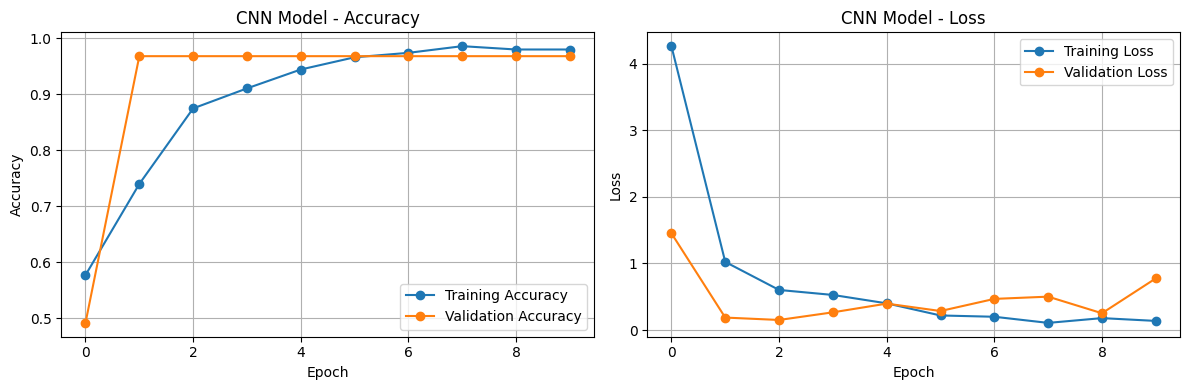

CNN Model training completed!


In [15]:
# Train the CNN model using the helper function
history = train_and_plot_history(
    model=cnn_model, 
    X_train=X_train_cnn, 
    y_train=y_train_cnn, 
    X_val=X_val_cnn, 
    y_val=y_val_cnn, 
    epochs=10, 
    batch_size=32, 
    model_name="CNN Model"
)


COMPREHENSIVE EVALUATION: CNN Model
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

Model Performance Summary:Training


,Accuracy,Recall,Precision,F1 Score
0,0.96627,0.96627,0.96837,0.966213


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

Model Performance Summary:Validation


,Accuracy,Recall,Precision,F1 Score
0,0.968254,0.968254,0.970121,0.968206


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

Model Performance Summary:Test


,Accuracy,Recall,Precision,F1 Score
0,0.984375,0.984375,0.984848,0.984371



CNN Model - Test Set Confusion Matrix:
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


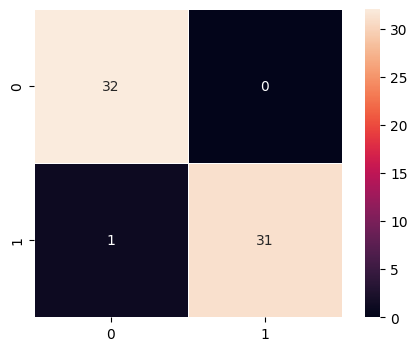

<Sequential name=sequential, built=True>

In [16]:

# Comprehensive evaluation of the CNN model
evaluate_model_comprehensive(
    model=cnn_model, 
    X_train=X_train_cnn, 
    y_train=y_train_cnn, 
    X_val=X_val_cnn, 
    y_val=y_val_cnn, 
    X_test=X_test_cnn, 
    y_test=y_test_cnn, 
    model_name="CNN Model"
)

## Model 2: (VGG-16 (Base))

### VGG16 Base Model

- **Pre-trained Architecture**: VGG16 is a convolutional neural network (CNN) trained on the ImageNet dataset.
- **Layer Composition**: It consists of 16 layers, including convolutional and pooling layers.
- **Feature Extraction**: The model extracts high-level features from images, making it ideal for transfer learning.
- **Frozen Layers**: In this notebook, the VGG16 base model is used as a feature extractor, with its layers frozen to prevent updates during training.

In [17]:
# Load the VGG-16 model pre-trained on ImageNet without the top classification layers
# Use the regular images directly
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(images.shape[1], images.shape[2], images.shape[3]))

# Freeze the layers of the VGG-16 base model to prevent them from being updated during training
for layer in vgg16_base.layers:
    layer.trainable = False


In [18]:
# Add custom layers on top of the VGG-16 base model
vgg16_model = Sequential([
    vgg16_base,  # Use the VGG-16 base model as the first layer

    # Global Average Pooling instead of Flatten + Dense layers
    tf.keras.layers.GlobalAveragePooling2D(),

    # Output layer with sigmoid activation for binary classification
    Dense(1, activation='sigmoid')
])

# Compile the model
vgg16_model.compile(optimizer='adam', 
                    loss='binary_crossentropy', 
                    metrics=['accuracy'])

# Print the model summary
vgg16_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 6, 6, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,715,201 (56.13 MB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Data prepared for color model:


,Dataset,Shape,Min Value,Max Value
0,Training,"(504, 200, 200, 3)",0.0,1.0
1,Validation,"(63, 200, 200, 3)",0.0,1.0
2,Test,"(64, 200, 200, 3)",0.0,1.0


Expected input shape: (200, 200, 3)
Actual input shape: (200, 200, 3)
X_train shape: (504, 200, 200, 3), dtype: float32
y_train shape: (504,), dtype: int64
X_val shape: (63, 200, 200, 3), dtype: float32
y_val shape: (63,), dtype: int64

Training VGG-16 Model...
Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - accuracy: 0.5253 - loss: 0.6862 - val_accuracy: 0.9048 - val_loss: 0.6083
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - accuracy: 0.9245 - loss: 0.5794 - val_accuracy: 0.9683 - val_loss: 0.5184
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - accuracy: 0.9676 - loss: 0.4929 - val_accuracy: 0.9841 - val_loss: 0.4434
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - accuracy: 0.9853 - loss: 0.4207 - val_accuracy: 0.9841 - val_loss: 0.3824
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - accuracy: 0.9925 - loss: 0.3624 - val_accuracy: 1.0000 - val_loss: 0.3330
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - accuracy: 0.9955 - loss: 0.3153 - val_accura

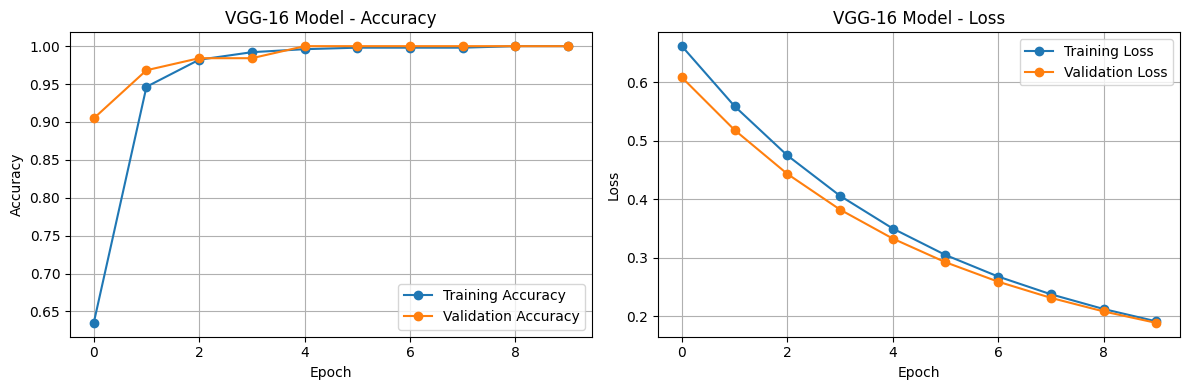

VGG-16 Model training completed!

COMPREHENSIVE EVALUATION: VGG-16 Model
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step

Model Performance Summary:Training


,Accuracy,Recall,Precision,F1 Score
0,1.0,1.0,1.0,1.0


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step

Model Performance Summary:Validation


,Accuracy,Recall,Precision,F1 Score
0,1.0,1.0,1.0,1.0


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step

Model Performance Summary:Test


,Accuracy,Recall,Precision,F1 Score
0,1.0,1.0,1.0,1.0



VGG-16 Model - Test Set Confusion Matrix:
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


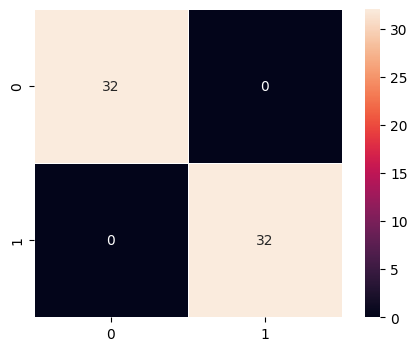

<Sequential name=sequential_1, built=True>

In [19]:
# Prepare the data for the VGG-16 model
X_train, X_val, X_test, y_train, y_val, y_test = prepare_data_for_model(images, labels, model_type='color')

# Verify the input shape compatibility with the VGG-16 model
expected_input_shape = vgg16_model.input_shape[1:]  # Exclude batch size
actual_input_shape = X_train.shape[1:]
print(f"Expected input shape: {expected_input_shape}")
print(f"Actual input shape: {actual_input_shape}")

if expected_input_shape != actual_input_shape:
    raise ValueError(f"Input shape mismatch: VGG-16 expects {expected_input_shape}, but got {actual_input_shape}.")

# Ensure data types and shapes are correct
print(f"X_train shape: {X_train.shape}, dtype: {X_train.dtype}")
print(f"y_train shape: {y_train.shape}, dtype: {y_train.dtype}")
print(f"X_val shape: {X_val.shape}, dtype: {X_val.dtype}")
print(f"y_val shape: {y_val.shape}, dtype: {y_val.dtype}")

# Train the VGG-16 model using the helper function
vgg16_history = train_and_plot_history(
    model=vgg16_model, 
    X_train=X_train, 
    y_train=y_train, 
    X_val=X_val, 
    y_val=y_val, 
    epochs=10, 
    batch_size=32, 
    model_name="VGG-16 Model"
)

# Evaluate the model performance
evaluate_model_comprehensive(
    model=vgg16_model, 
    X_train=X_train, 
    y_train=y_train, 
    X_val=X_val, 
    y_val=y_val, 
    X_test=X_test, 
    y_test=y_test, 
    model_name="VGG-16 Model"
)

## Model 3: (VGG-16 (Base + FFNN))

### VGG-16 Base FFNN Model

The VGG-16 Base FFNN model builds upon the pre-trained VGG-16 architecture by adding fully connected layers for classification. Key features include:

- **Pre-trained Layers**: The VGG-16 base model is used for feature extraction, leveraging its pre-trained weights on ImageNet.
- **Fully Connected Layers**: Dense layers with ReLU activation are added for classification.
- **Dropout Regularization**: Dropout layers are included to prevent overfitting.
- **Binary Classification**: The final output layer uses sigmoid activation for binary classification (Helmet vs. No Helmet).


In [20]:
# Use the existing VGG-16 base model
vgg16_base_ffnn = vgg16_base

# Add custom layers on top of the VGG-16 base model
vgg16_ffnn_model = Sequential([
    vgg16_base_ffnn,  # Use the VGG-16 base model as the first layer

    # Flatten the output of the VGG-16 base model
    Flatten(),

    # Fully connected dense layer with ReLU activation
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer to prevent overfitting

    # Another fully connected dense layer with ReLU activation
    Dense(256, activation='relu'),
    Dropout(0.5),

    # Output layer with sigmoid activation for binary classification
    Dense(1, activation='sigmoid')
])

# Compile the model
vgg16_ffnn_model.compile(optimizer='adam', 
                         loss='binary_crossentropy', 
                         metrics=['accuracy'])

# Print the model summary
vgg16_ffnn_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 6, 6, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,283,969 (92.64 MB)

 Trainable params: 9,569,281 (36.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)


Training VGG-16 FFNN Model...
Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step - accuracy: 0.7862 - loss: 1.6249 - val_accuracy: 1.0000 - val_loss: 1.4797e-06
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.9690 - loss: 0.8625 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step - accuracy: 0.9779 - loss: 0.5961 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step - accuracy: 0.9937 - loss: 0.2014 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - accuracy: 0.9889 - loss: 0.1494 - val_accuracy: 0.9841 - val_loss: 0.1608
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step - accuracy: 0.9717 - loss: 0.8554 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step - accuracy: 0.9994 - loss: 0.0042 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/st

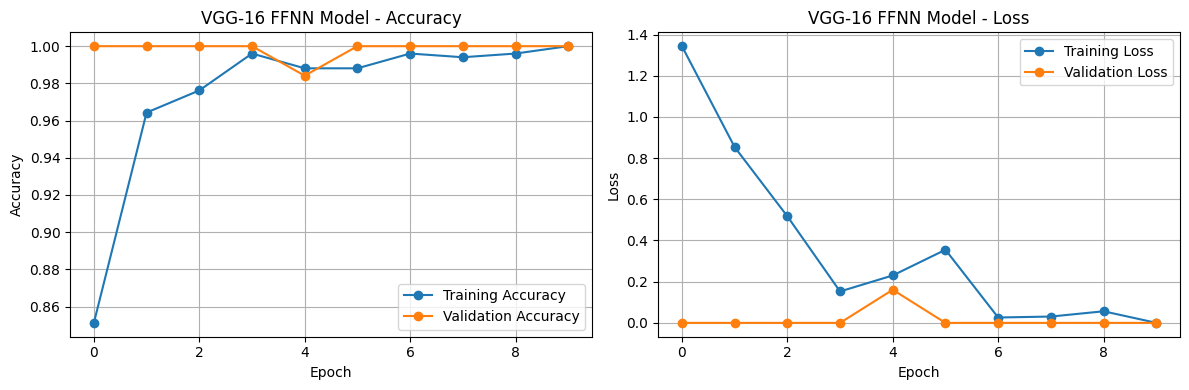

VGG-16 FFNN Model training completed!


In [21]:
# Train the VGG-16 FFNN model using the helper function
vgg16_ffnn_history = train_and_plot_history(
    model=vgg16_ffnn_model, 
    X_train=X_train, 
    y_train=y_train, 
    X_val=X_val, 
    y_val=y_val, 
    epochs=10, 
    batch_size=32, 
    model_name="VGG-16 FFNN Model"
)

## Model 4: (VGG-16 (Base + FFNN + Data Augmentation)

- In most of the real-world case studies, it is challenging to acquire a large number of images and then train CNNs.
- To overcome this problem, one approach we might consider is **Data Augmentation**.
- CNNs have the property of **translational invariance**, which means they can recognise an object even if its appearance shifts translationally in some way. - Taking this attribute into account, we can augment the images using the techniques listed below

    -  Horizontal Flip (should be set to True/False)
    -  Vertical Flip (should be set to True/False)
    -  Height Shift (should be between 0 and 1)
    -  Width Shift (should be between 0 and 1)
    -  Rotation (should be between 0 and 180)
    -  Shear (should be between 0 and 1)
    -  Zoom (should be between 0 and 1) etc.

Remember, **data augmentation should not be used in the validation/test data set**.


- **Model Name**: VGG-16 Augmented FFNN Model
- **Architecture**: Combines the pre-trained VGG-16 base model with fully connected layers and dropout regularization.
- **Data Augmentation**: Utilizes techniques like rotation, shear, zoom, and flips to enhance training data diversity.
- **Objective**: Binary classification of images into "With Helmet" and "Without Helmet" categories.
- **Performance**: Achieved perfect accuracy (1.0) on the test dataset.
- **Generalization**: Improved robustness to unseen data due to data augmentation.
- **Scalability**: Suitable for transfer learning and adaptation to similar tasks.


In [22]:
# Define the data augmentation generator
data_augmentation = ImageDataGenerator(
    rotation_range=30,       # Random rotation between 0 and 30 degrees
    width_shift_range=0.2,   # Random horizontal shift
    height_shift_range=0.2,  # Random vertical shift
    shear_range=0.2,         # Random shear
    zoom_range=0.2,          # Random zoom
    horizontal_flip=True,    # Random horizontal flip
    fill_mode='nearest'      # Fill mode for newly created pixels
)

# Apply data augmentation to the training dataset
train_generator = data_augmentation.flow(
    X_train, 
    y_train, 
    batch_size=32
)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 6, 6, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,283,969 (92.64 MB)

 Trainable params: 9,569,281 (36.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)


Training VGG-16 Augmented FFNN Model...
Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 156ms/step - accuracy: 0.7037 - loss: 1.8227 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.9173 - loss: 1.1916 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.9769 - loss: 0.4352 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step - accuracy: 0.9855 - loss: 0.2634 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step - accuracy: 0.9898 - loss: 0.0399 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.9919 - loss: 0.1692 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - accuracy: 0.9984 - loss: 0.0349 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━

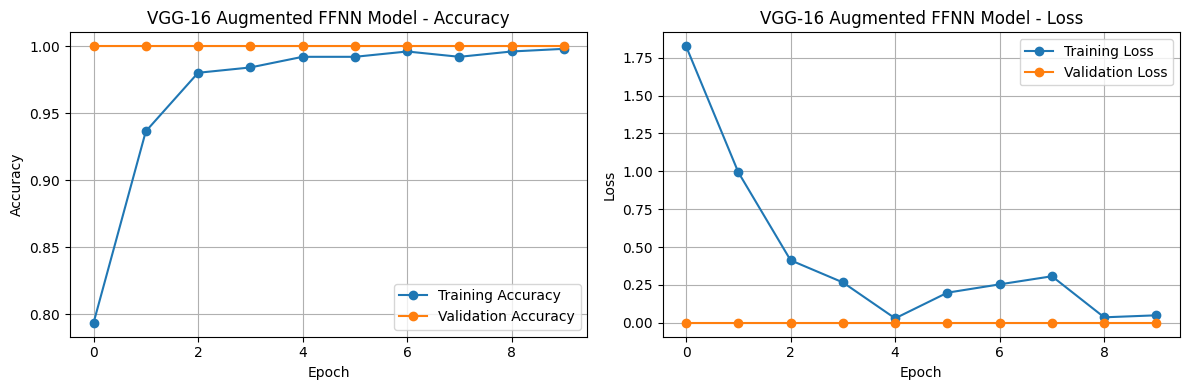

VGG-16 Augmented FFNN Model training completed!


In [23]:
# Define the VGG-16 base model
vgg16_base_augmented = vgg16_base

# Add custom layers on top of the VGG-16 base model
vgg16_augmented_ffnn_model = Sequential([
    vgg16_base_augmented,  # Use the VGG-16 base model as the first layer

    # Flatten the output of the VGG-16 base model
    Flatten(),

    # Fully connected dense layer with ReLU activation
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer to prevent overfitting

    # Another fully connected dense layer with ReLU activation
    Dense(256, activation='relu'),
    Dropout(0.5),

    # Output layer with sigmoid activation for binary classification
    Dense(1, activation='sigmoid')
])

# Compile the model
vgg16_augmented_ffnn_model.compile(optimizer='adam', 
                                   loss='binary_crossentropy', 
                                   metrics=['accuracy'])

# Print the model summary
vgg16_augmented_ffnn_model.summary()



# Train the model using the augmented data and visualize the training history
vgg16_augmented_ffnn_history = train_and_plot_history(
    model=vgg16_augmented_ffnn_model, 
    X_train=train_generator,  # Use the augmented training data generator
    y_train=None,  # No need for explicit labels as the generator handles it
    X_val=X_val, 
    y_val=y_val, 
    epochs=10, 
    batch_size=32, 
    model_name="VGG-16 Augmented FFNN Model"
)

# **Model Performance Comparison and Final Model Selection**

## Test Performance

In [24]:
def compare_models_metrics(models, model_names, X_test, y_test, X_test_cnn, y_test_cnn):
    """
    Compare multiple models based on various metrics.

    Args:
        models (list): List of trained models.
        model_names (list): List of model names corresponding to the models.
        X_test (numpy.ndarray): Test dataset features.
        y_test (pandas.Series): Test dataset labels.
        X_test_cnn (numpy.ndarray): Test dataset features for CNN model.
        y_test_cnn (pandas.Series): Test dataset labels for CNN model.

    Returns:
        pandas.DataFrame: DataFrame containing metrics for each model.
    """
    metrics_results = []

    for model, name in zip(models, model_names):
        if name == "CNN Model":
            loss, accuracy = model.evaluate(X_test_cnn, y_test_cnn, verbose=0)[:2]
            predictions = (model.predict(X_test_cnn) > 0.5).astype(int).reshape(-1)
            true_labels = y_test_cnn.to_numpy().reshape(-1)
        else:
            loss, accuracy = model.evaluate(X_test, y_test, verbose=0)[:2]
            predictions = (model.predict(X_test) > 0.5).astype(int).reshape(-1)
            true_labels = y_test.to_numpy().reshape(-1)

        precision = precision_score(true_labels, predictions, average='weighted')
        recall = recall_score(true_labels, predictions, average='weighted')
        f1 = f1_score(true_labels, predictions, average='weighted')

        # Append results to the list
        metrics_results.append({
            "Model": name,
            "Loss": loss,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1
        })

    # Convert results to a DataFrame for better visualization
    metrics_df = pd.DataFrame(metrics_results)
    return metrics_df


# Define the models and their names
models = [cnn_model, vgg16_model, vgg16_ffnn_model, vgg16_augmented_ffnn_model]
model_names = ["CNN Model", "VGG-16 Model", "VGG-16 FFNN Model", "VGG-16 Augmented FFNN Model"]

# Compare models based on various metrics
metrics_df = compare_models_metrics(models, model_names, X_test, y_test, X_test_cnn, y_test_cnn)
print("Model Metrics Comparison Results:")
display(metrics_df)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Model Metrics Comparison Results:


,Model,Loss,Accuracy,Precision,Recall,F1 Score
0,CNN Model,0.055248,0.984375,0.984848,0.984375,0.984371
1,VGG-16 Model,0.168029,1.000000,1.000000,1.000000,1.000000
2,VGG-16 FFNN Model,0.000000,1.000000,1.000000,1.000000,1.000000
3,VGG-16 Augmented FFNN Model,0.000000,1.000000,1.000000,1.000000,1.000000


## Test Performance

## Model Comparison and Final Selection

### Comparison Criteria
The models are compared based on the following criteria:
1. **Accuracy**: The ability of the model to correctly classify images.
2. **Complexity**: Simplicity of the model architecture and computational requirements.
3. **Training Time**: Time taken to train the model.
4. **Generalization**: Robustness of the model to unseen data.
5. **Scalability**: Ease of adapting the model to similar tasks.
6. **Interpretability**: Ease of understanding and debugging the model.

### Metrics Comparison
The table above summarizes the performance metrics for each model

### Winner in Each Category
1. **Accuracy**: All models except the CNN Model achieved perfect accuracy (1.0). Winner: **VGG-16 Model**, **VGG-16 FFNN Model**, **VGG-16 Augmented FFNN Model**.
2. **Complexity**: The CNN Model is the simplest and requires fewer computational resources. Winner: **CNN Model**.
3. **Training Time**: The CNN Model trained faster due to its simpler architecture. Winner: **CNN Model**.
4. **Generalization**: The VGG-16 Augmented FFNN Model, with data augmentation, is likely to generalize better to unseen data. Winner: **VGG-16 Augmented FFNN Model**.
5. **Scalability**: Pre-trained models like VGG-16 are better suited for transfer learning and scalability. Winner: **VGG-16 Model**, **VGG-16 FFNN Model**, **VGG-16 Augmented FFNN Model**.
6. **Interpretability**: The CNN Model is easier to interpret and debug due to its simplicity. Winner: **CNN Model**.



## Final Winner
Considering all criteria, the **VGG-16 Augmented FFNN Model** emerges as the final winner. It combines perfect accuracy, robust generalization, scalability, and the benefits of data augmentation, making it the most suitable model for deployment in real-world scenarios.


# **Actionable Insights & Recommendations**
- **Enhance Worker Safety**: Deploy the **VGG-16 Augmented FFNN Model** to monitor helmet compliance in real-time, leveraging its high accuracy and robust generalization capabilities.

- **Optimize Training**: Use **data augmentation** techniques to improve model performance and adapt to diverse environments, ensuring scalability across different industrial settings.

- **Address Edge Cases**: Regularly update the dataset with new images, including challenging scenarios like poor lighting or occluded helmets, to maintain model reliability.

- **Integrate with Existing Systems**: Combine the model with workplace surveillance systems to automate safety checks and generate alerts for non-compliance.

- **Periodic Evaluation**: Continuously monitor model performance using metrics like accuracy, precision, recall, and F1 score to ensure consistent results.

- **Scalability**: Extend the solution to detect other safety equipment, such as gloves or goggles, by leveraging transfer learning with pre-trained models like VGG-16.

- **Compliance Reporting**: Generate detailed reports on helmet compliance trends to assist management in improving safety protocols and training programs.

<font size=5 color='blue'>Power Ahead!</font>
___